# Data Science Fundamentals Final Project
### - Phil Roesch and Frankie Guarino

Our data set comes from https://www.kaggle.com/sakshigoyal7/credit-card-customers

<b>Description:</b><br/>
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

In [1]:
# !unzip archive.zip
# !rm archive.zip

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('BankChurners.csv')
print(data.shape)
del data['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del data['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
print(data.columns)
data.head()

(10127, 23)
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Our data contains 21 columns:
<ol>
    <li>Client Number</li>
    <li>Attrition_Flag - ['Existing Customer', 'Attrited Customer']</li>
    <li>Customer_Age - range [26,73]</li>
    <li>Gender - ['M', 'F']</li>
    <li>Dependent_count - range [0, 5]</li>
    <li>Education_level - ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']</li>
    <li>Martial_Status - ['Single', 'Married', 'Divorced', 'Unknown']</li>
    <li>Income_Category - ['Less than $40K', '$60K - $80K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']</li>
    <li>Card_Category - ['Blue', 'Silver', 'Gold', 'Platinum']</li>
    <li>Months_on_book - 'Period of relationship with bank'</li>
    <li>Total_Relationship_Count - Total no. of products held by the customer</li>
    <li>Months_Inactive_12_mon - No. of months inactive in the last 12 months</li>
    <li>Contacts_Count_12_mon - No. of Contacts in the last 12 months</li>
    <li>Credit_Limit - Credit Limit on the Credit Card</li>
    <li>Total_Revolving_Bal - Total Revolving Balance on the Credit Card</li>
    <li>Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)</li>
    <li>Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)</li>
    <li>Total_Trans_Amt - Total Transaction Amount (Last 12 months)</li>
    <li>Total_Trans_Ct - Total Transaction Count (Last 12 months)</li>
    <li>Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1)</li>
    <li>Avg_Utilization_Ratio - Average Card Utilization Ratio</li>
</ol>
*<i>two columns were dropped, dealing with naive bayes</i>

## Credit Card Recommender
### Based on a user's demographics, recommend a credit card color for them

Separate demographic information (columns 3 to 7) and use one-hot-encoding to transform the dataframe, predict the credit card one uses

In [20]:
demo_df = data[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
# demo_df.set_index('CLIENTNUM', inplace=True)
card = demo_df[['Card_Category']]
# print(demo_df.head())
disc_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category']
cont_cols = ['Customer_Age', 'Dependent_count']

In [21]:
def make_bar(cat) :
    demo_df.groupby(cat).size().plot(kind='bar', title=cat, label="")
def make_pie(cat) :
    demo_df.groupby(cat).size().plot(kind='pie', autopct='%.1f', title=cat, label="")

Demographic Charts:

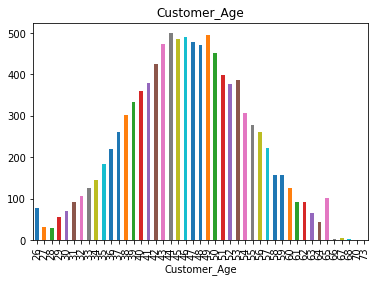

In [18]:
make_bar('Customer_Age')

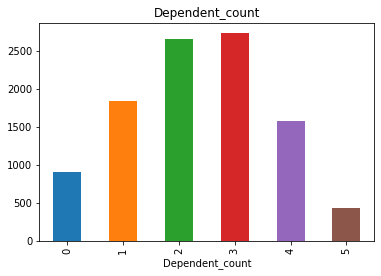

In [19]:
make_bar('Dependent_count')

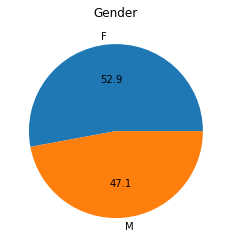

In [15]:
make_pie('Gender')

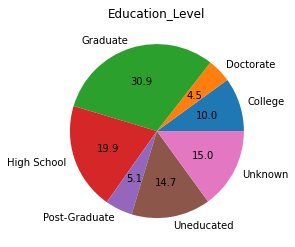

In [6]:
make_pie('Education_Level')

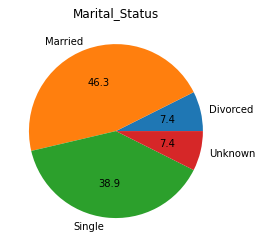

In [7]:
make_pie('Marital_Status')

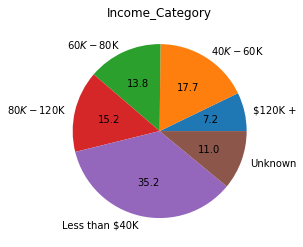

In [8]:
make_pie('Income_Category')

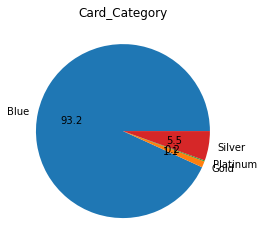

In [22]:
make_pie('Card_Category')

An overwhelming majority of customers (93.2%) have a Blue card

We encode the discrete information using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">One Hot Encoding</a> to then feed into a decision tree classifier to help select users. We can use this as a credit card recommender system.

In [23]:
from sklearn.preprocessing import OneHotEncoder
del demo_df['Card_Category']

def encode(_data, _disc_cols, _cont_cols):
    
    disc_df = _data[_disc_cols]
    cont_df = _data[_cont_cols]
    
    _enc = OneHotEncoder()
    return _enc.fit(disc_df)

def create_df(_data, _enc, _disc_cols = disc_cols, _cont_cols = cont_cols):   
    hot_df = pd.DataFrame(data=_enc.transform(_data[_disc_cols]).toarray(), columns=_enc.get_feature_names())
    return pd.concat([_data[_cont_cols], hot_df], axis=1)

enc = encode(demo_df, disc_cols, cont_cols)    
enc.get_feature_names()
rec_df = create_df(demo_df, enc)

# print(rec_df.size)
# print(rec_df.columns)
rec_df.head()

,Customer_Age,Dependent_count,x0_F,x0_M,x1_College,x1_Doctorate,x1_Graduate,x1_High School,x1_Post-Graduate,x1_Uneducated,...,x2_Divorced,x2_Married,x2_Single,x2_Unknown,x3_$120K +,x3_$40K - $60K,x3_$60K - $80K,x3_$80K - $120K,x3_Less than $40K,x3_Unknown
0,45,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,51,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,40,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Import our decision tree model and fit it to our data

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf.fit(rec_df, card)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
#creates random data

import random

def get_cats(_data, _col):
    return np.sort(_data[_col].unique())

def create_item():
    my_data = [random.randint(26,73),
               get_cats(demo_df, 'Gender')[random.randint(0,1)],
               get_cats(demo_df, 'Dependent_count')[random.randint(0,5)],
               get_cats(demo_df, 'Education_Level')[random.randint(0,6)],
               get_cats(demo_df, 'Marital_Status')[random.randint(0,3)],
               get_cats(demo_df, 'Income_Category')[random.randint(0,5)]]
    return my_data

create_item()

[39, 'M', 0, 'Doctorate', 'Single', 'Less than $40K']

Test model accuracy against itself

In [12]:
# pred = pd.DataFrame(data=[create_item()], columns=demo_df.columns)
# pred.head()
# my_df = create_df(pred, enc)
# my_df.head()
recommend = clf.predict(rec_df)
(card['Card_Category'] == recommend).sum() / recommend.size

0.9344327046509332

Split into stratified samples for different models

[Text(163.86987487853872, 213.55714285714285, 'X[0] <= 38.5\ngini = 0.75\nsamples = 10127\nvalue = [2531.75, 2531.75, 2531.75, 2531.75]'),
 Text(36.483928733837104, 205.79142857142858, 'X[12] <= 0.5\ngini = 0.662\nsamples = 1703\nvalue = [431.707, 327.381, 0.0, 360.375]'),
 Text(29.12036037803509, 198.0257142857143, 'X[9] <= 0.5\ngini = 0.664\nsamples = 978\nvalue = [241.477, 261.905, 0.0, 301.073]'),
 Text(22.327532663603858, 190.26, 'X[11] <= 0.5\ngini = 0.663\nsamples = 836\nvalue = [206.597, 261.905, 0.0, 246.332]'),
 Text(12.193997640528854, 182.4942857142857, 'X[0] <= 28.5\ngini = 0.659\nsamples = 734\nvalue = [181.376, 261.905, 0.0, 209.839]'),
 Text(1.3363046732080492, 174.72857142857143, 'X[14] <= 0.5\ngini = 0.492\nsamples = 91\nvalue = [23.343, 0.0, 0.0, 18.247]'),
 Text(0.44543489106934975, 166.96285714285713, 'X[0] <= 27.5\ngini = 0.417\nsamples = 83\nvalue = [21.733, 0.0, 0.0, 9.123]'),
 Text(0.22271744553467487, 159.19714285714286, 'gini = 0.0\nsamples = 70\nvalue = [18.

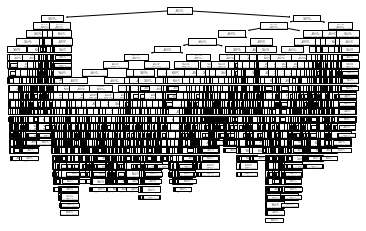

In [13]:
tree.plot_tree(clf)